#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [482]:
import pandas as pd


In [483]:
df = pd.read_csv("imdb_top_10000.txt", delimiter ="\t")
df.head()

tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.  \
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.   
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.   
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.   
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.   
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.   

                        Crime|Drama  
0                    Crime|Thriller  
1            Drama|Mystery|Thriller  
2           Action|Adventure|Sci-Fi  
3  Action|Adventure|Sci-Fi|Thriller  
4              Comedy|Drama|Romance

In [484]:
df = pd.read_csv("imdb_top_10000.txt", delimiter ="\t", names=['imdbID','title','year','score','votes','runtime','genres'])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

# Cleaning Data: Examining Dataframe

In [485]:
#Checking the datatypes
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [486]:
#Checking for NaN values
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [487]:
#null values in genres 
df[df.genres.isna() == True]

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

#Dealing with missing values (Data Cleaning)

In [488]:
df.shape

(10000, 7)

In [489]:
#drop null values
df.dropna(subset=['genres'],inplace=True)

In [490]:
df.shape

(9999, 7)

In [491]:
#done with cleaning of dataframe
#checking the column data types again
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

## 2. Asking Questions

To determine the movies having highest score in a particular year using title, score and year column.

In [492]:
# 10 is highest, maximun rating is 9.2 in this dataframe
df['score'].max()


9.2

In [493]:
# 0 is lowest, minimun rating is 1.5 in this dataframe
df['score'].min() 


1.5

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

**From runtime remove mins and convert to int**

In [494]:
df.head()
url = df.runtime[0]
url

'142 mins.'

In [495]:
time = df.runtime[0].replace('mins.','')
time

'142 '

In [496]:
def get_runtime(url):
  time = url.replace('mins.','')
  return time


df['runtime'] = df.runtime.map(get_runtime)
df.head()

imdbID                            title  year  score   votes runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479    142    
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065    154    
2  tt0137523                Fight Club (1999)  1999    8.8  458173    139    
3  tt0133093                The Matrix (1999)  1999    8.7  448114    136    
4  tt1375666                 Inception (2010)  2010    8.9  385149    148    

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [497]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [498]:
df.runtime = df.runtime.astype('int')
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime      int64
genres      object
dtype: object

**Removing movie year from title column**

In [499]:
df.head()
url = df.title[0]
url

'The Shawshank Redemption (1994)'

In [500]:
title = url.split(" (")[0]
title

'The Shawshank Redemption'

In [501]:
def get_title(url):
  title = url.split(" (")[0]
  return title

df['title'] = df.title.map(get_title)
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

**Genres**

In [502]:
#find unique genres 
genre_set = set()
for genre in df.genres:
  genre_set.update(genre.split('|'))

In [503]:
len(genre_set)

24

In [504]:
#to create 24 columns
for genre in genre_set:
    df[genre] = [genre in row.split("|") for row in df.genres]

In [505]:
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  Western   News  Drama  ...  Adult  \
0                       Crime|Drama    False  False   True  ...  False   
1                    Crime|Thriller    False  False  False  ...  False   
2            Drama|Mystery|Thriller    False  False   True  ...  False   
3           Action|Adventure|Sci-Fi    False  False  False  ...  False   
4  Action|Adventure|Sci-Fi|Thriller    False  False  False  ...  False   

   Musical  Fantasy  Thriller  Crime  Comedy  History  Family  Reality-TV  \
0    False    False     False   True   False    False   False       False   
1    False    False      True   True   False    False   False       False   
2    False    False      True  False   False    False   False       False   
3    False    False     False  False   False    False   False       False   
4    False    False      True  False   False    False   False       False   

   Sci-Fi  
0   False  
1   False  
2   False  
3    True  
4    True  

[5 rows x 31 columns]

## 4. EDA

In [506]:
df.head()

imdbID                     title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154   
2  tt0137523                Fight Club  1999    8.8  458173      139   
3  tt0133093                The Matrix  1999    8.7  448114      136   
4  tt1375666                 Inception  2010    8.9  385149      148   

                             genres  Western   News  Drama  ...  Adult  \
0                       Crime|Drama    False  False   True  ...  False   
1                    Crime|Thriller    False  False  False  ...  False   
2            Drama|Mystery|Thriller    False  False   True  ...  False   
3           Action|Adventure|Sci-Fi    False  False  False  ...  False   
4  Action|Adventure|Sci-Fi|Thriller    False  False  False  ...  False   

   Musical  Fantasy  Thriller  Crime  Comedy  History  Family  Reality-TV  \
0    False    False     False   True   False    False   False       False   
1    False    False      True   True   False    False   False       False   
2    False    False      True  False   False    False   False       False   
3    False    False     False  False   False    False   False       False   
4    False    False      True  False   False    False   False       False   

   Sci-Fi  
0   False  
1   False  
2   False  
3    True  
4    True  

[5 rows x 31 columns]

In [507]:
import matplotlib.pyplot as plt
%matplotlib inline

In [508]:
ndf = df[['title','score','votes']]
ndf

title  score   votes
0     The Shawshank Redemption    9.2  619479
1                 Pulp Fiction    9.0  490065
2                   Fight Club    8.8  458173
3                   The Matrix    8.7  448114
4                    Inception    8.9  385149
...                        ...    ...     ...
9995                   Meduzot    7.0    1357
9996            Daltry Calhoun    5.2    1357
9997    The Quiller Memorandum    6.5    1356
9998                      Taal    6.5    1356
9999            The Navigators    6.9    1356

[9999 rows x 3 columns]

In [509]:
minscore=ndf['score'].min()
print("The minimum score is", minscore)
maxscore = ndf['score'].max()
print("The maximum score is", maxscore)

The minimum score is 1.5
The maximum score is 9.2


In [510]:
yeardf = df.groupby("year")
df2009 = yeardf.get_group(2009)

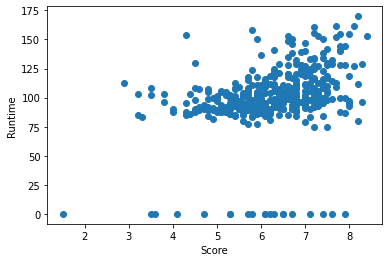

In [511]:
x = df2009.score
y = df2009.runtime

plt.scatter(x,y)
plt.xlabel('Score')
plt.ylabel('Runtime')
plt.show()


In [512]:
year09 = yeardf[['score','runtime']].mean()[:10]

<function matplotlib.pyplot.show>

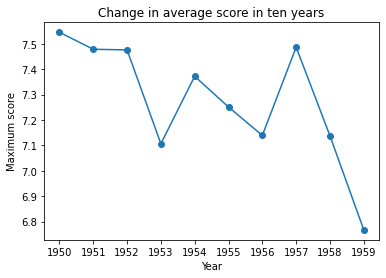

In [513]:
plt.plot(year09.index,year09.score,marker='o')
plt.xticks(year09.index)
plt.title('Change in average score in ten years')
plt.xlabel("Year")
plt.ylabel("Maximum score")
plt.show

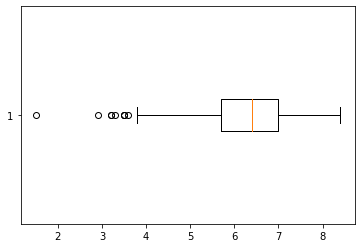

In [514]:
plt.boxplot(df2009.score,vert=False)
plt.show()

## 5. Determining Best Movies

In [515]:
newdf = df.groupby("year")
newdf


In [516]:
len(newdf)

62

In [517]:
year_check = df.groupby("year", sort=False)
year_check

In [518]:
# finding for minimum score from the dataframe
for key, valuedf in year_check:
    highest_score = valuedf[valuedf['score'] == valuedf.score.max()]
    print(highest_score.title,highest_score.year,highest_score.score)
    break

0    The Shawshank Redemption
Name: title, dtype: object 0    1994
Name: year, dtype: int64 0    9.2
Name: score, dtype: float64


*   The best movie name is The Shawshank 
Redemption(1994) with a highest score that is 9.2.

## 6. Trends in Popularity of Genres

In [519]:
genredf = df[list(genre_set)]
genredf.head()

Western   News  Drama  Music  Animation  Adventure  Film-Noir    War  \
0    False  False   True  False      False      False      False  False   
1    False  False  False  False      False      False      False  False   
2    False  False   True  False      False      False      False  False   
3    False  False  False  False      False       True      False  False   
4    False  False  False  False      False       True      False  False   

   Sport  Romance  ...  Adult  Musical  Fantasy  Thriller  Crime  Comedy  \
0  False    False  ...  False    False    False     False   True   False   
1  False    False  ...  False    False    False      True   True   False   
2  False    False  ...  False    False    False      True  False   False   
3  False    False  ...  False    False    False     False  False   False   
4  False    False  ...  False    False    False      True  False   False   

   History  Family  Reality-TV  Sci-Fi  
0    False   False       False   False  
1    False   False       False   False  
2    False   False       False   False  
3    False   False       False    True  
4    False   False       False    True  

[5 rows x 24 columns]

In [520]:
#to check most popular
genre_result = genredf.sum()
y = genre_result.sort_values(ascending=False)[:10]
x = y.index

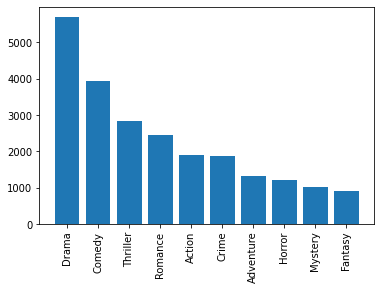

In [521]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

*   From 24 column genres "Drama" is the most popular.

